# Two model logistic regression 
part for part

In [117]:
import os
import pandas as pd
import numpy as np
from data.datasets import get_pd_dataset,prepare_and_split_data
from config import CONFIG
import matplotlib.pyplot as plt
from classifiers.TM_log_reg import ClassicLogReg
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report

In [118]:
CONFIG.from_json("config.json")

In [119]:
data = get_pd_dataset(name="BreastCancer")
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [120]:
X_train,s_train,X_test,y_test = prepare_and_split_data(
    data,
    test_size=0.22,
    c=0.5,
    labeling_mechanism="SAR_10_10",
    scale_data="standard"
)


print("X_train shape:", X_train.shape)
print("y_train shape:", s_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

y_train= CONFIG.true_train_labels
s_test = CONFIG.PU_test_labels

print("True train labels shape:", y_train.shape)
print("S_test shape:", s_test.shape)
print("validate c ", (s_train.sum()/y_train.sum()))
ALPHA = 0.5

X_train shape: (443, 30)
y_train shape: (443,)
X_test shape: (126, 30)
y_test shape: (126,)
True train labels shape: (443,)
S_test shape: (126,)
validate c  0.5


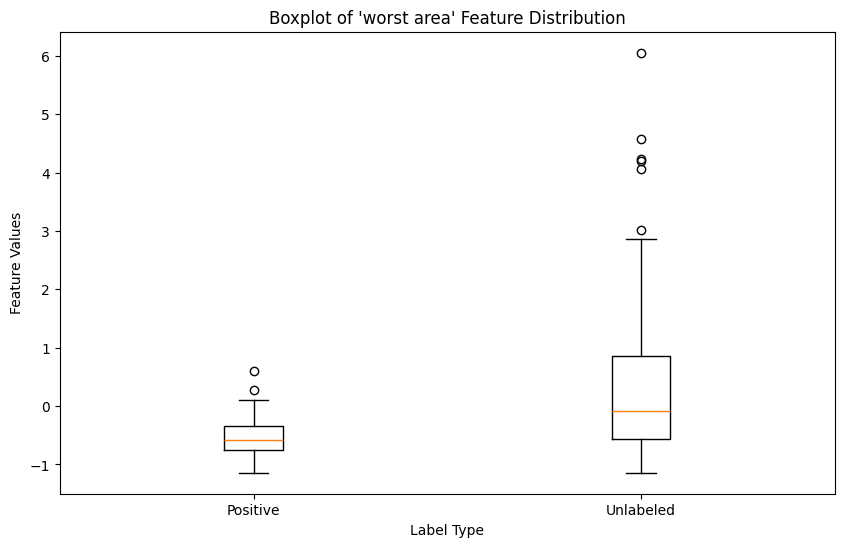

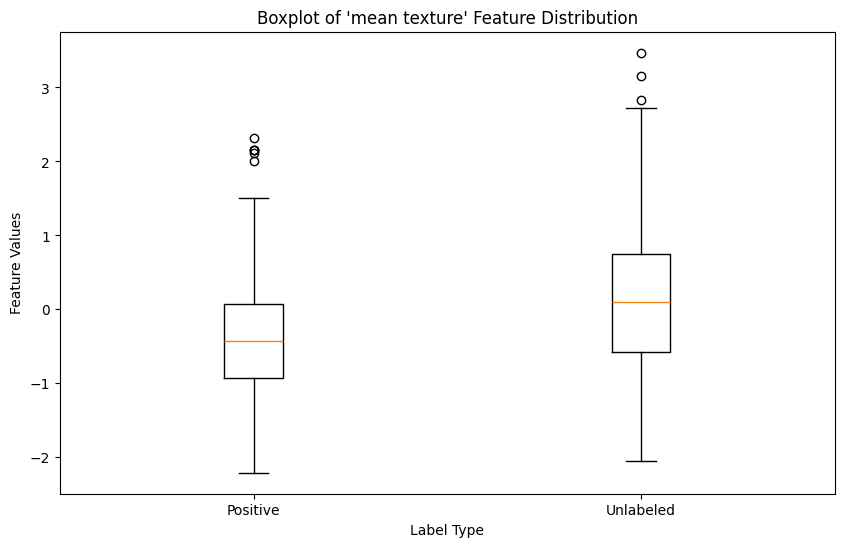

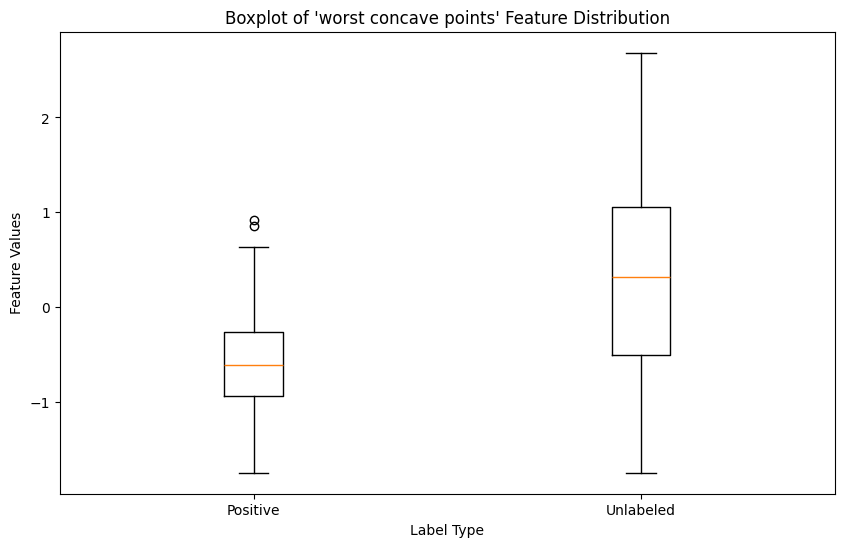

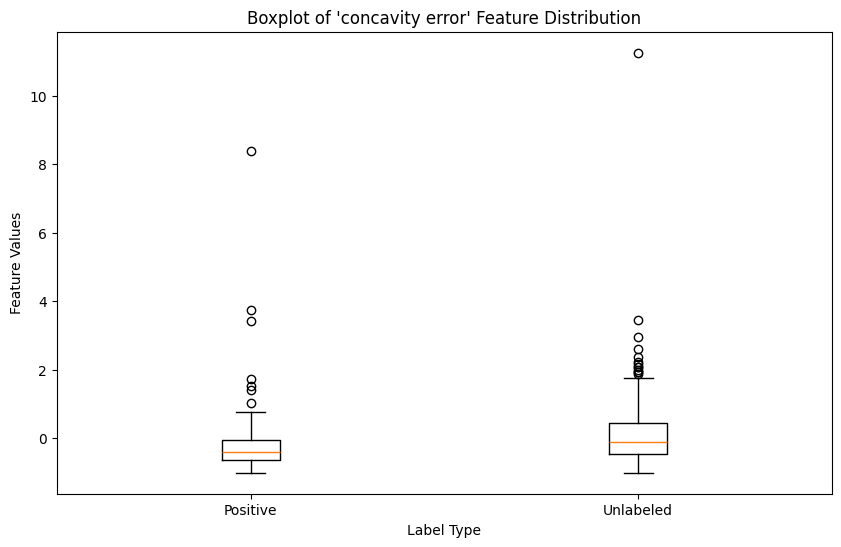

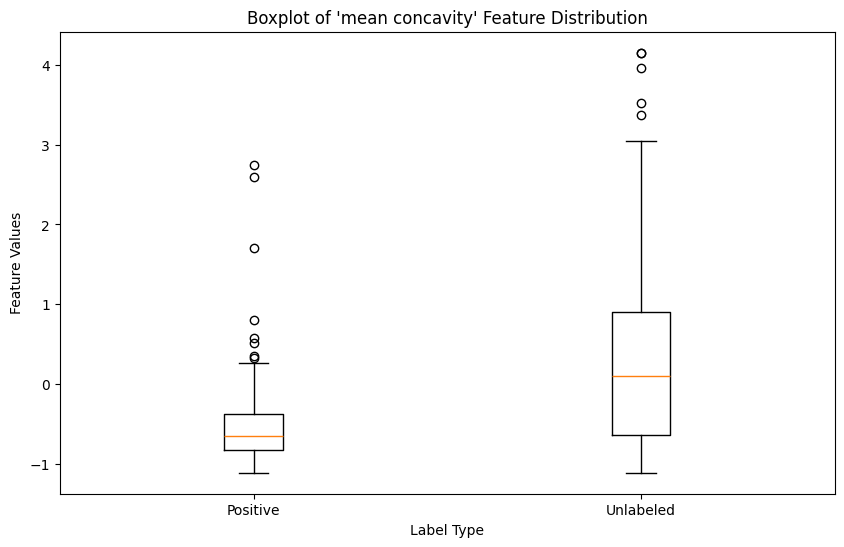

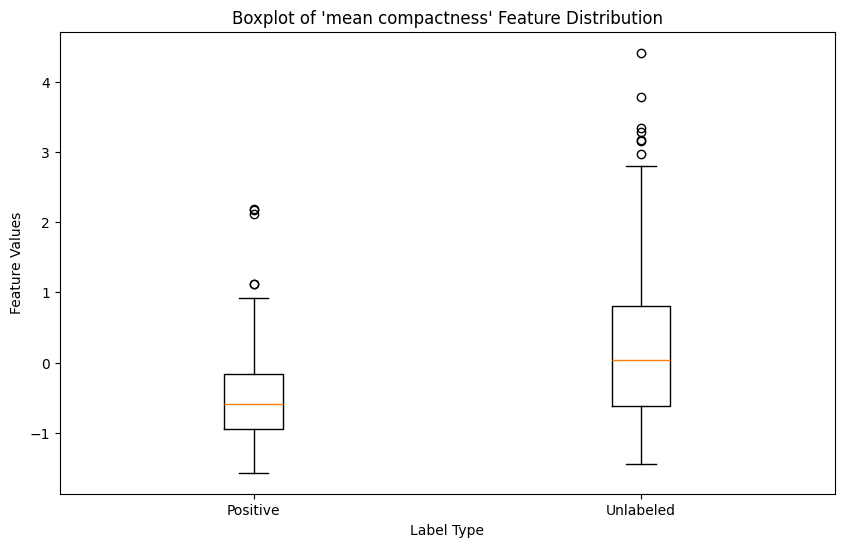

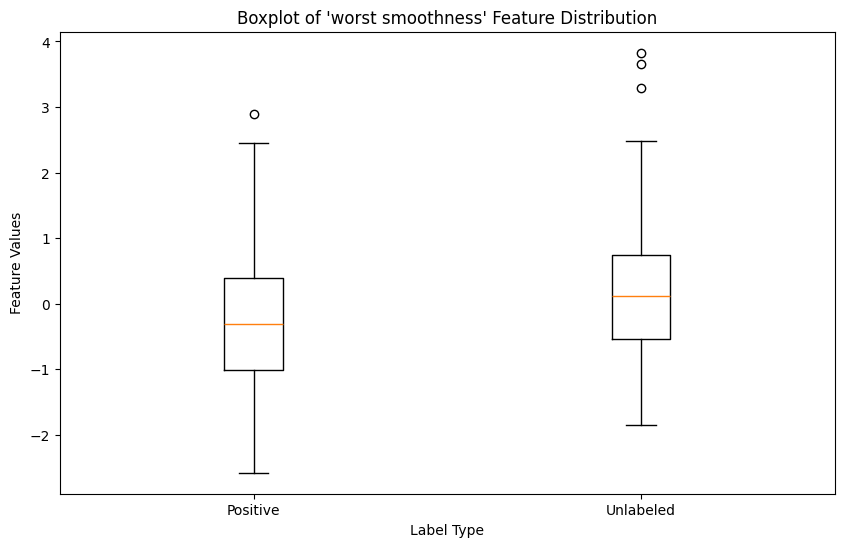

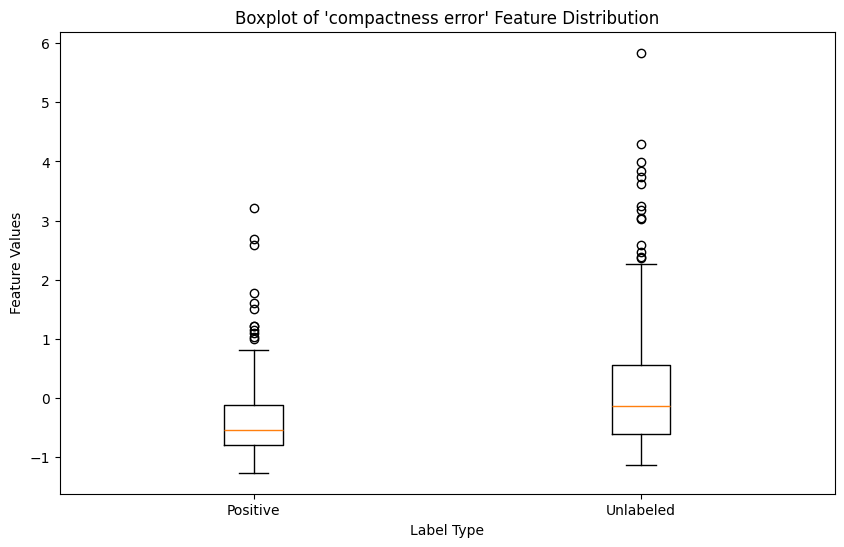

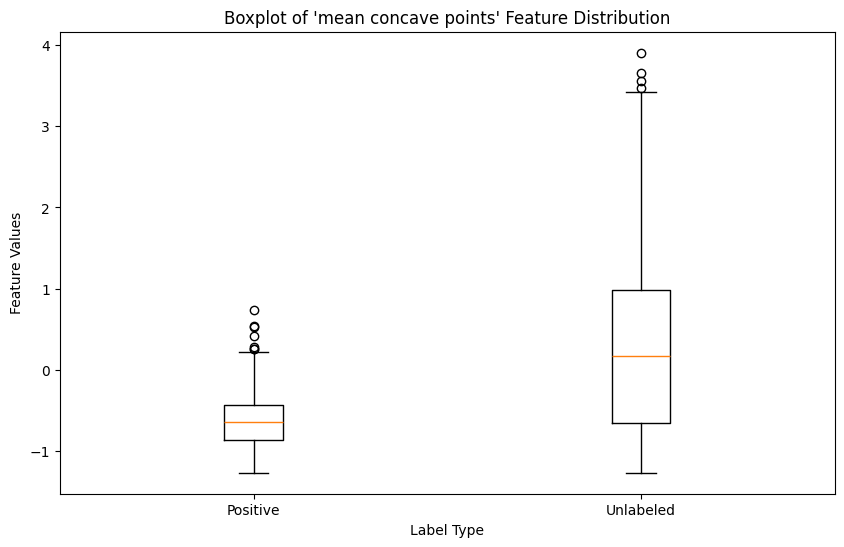

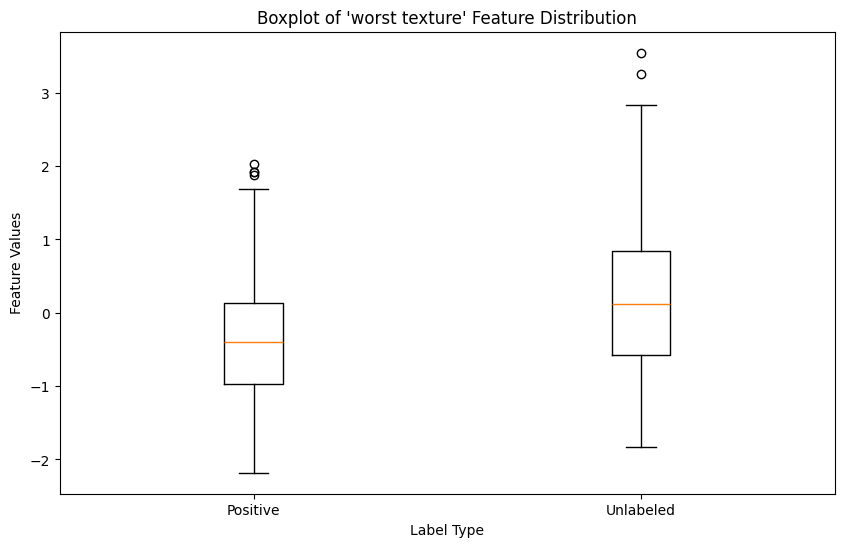

In [121]:
#find the number for which column == ["worst_concave"]
pos_idx = s_train > 0
un_idx = s_train == 0
for feature in CONFIG.dominant_features:
    plt.figure(figsize=(10, 6))
    plt.boxplot([X_train[pos_idx][feature], X_train[un_idx][feature]], 
                tick_labels=['Positive', 'Unlabeled'])
    plt.title(f"Boxplot of '{feature}' Feature Distribution")
    plt.ylabel("Feature Values")
    plt.xlabel("Label Type")
    plt.show()


In [122]:
f1_scores = []
def metrics(y_true, y_pred):
 
    result = classification_report(y_true, y_pred, output_dict=True)
    result = pd.DataFrame(result).transpose()
    result = np.round(result, 2)
    f1_scores.append(result["f1-score"].iloc[1])
    return result

### Fit the model on positive and unlabeled data


In [123]:
e_x = ClassicLogReg(penalty="l2")
e_x.fit(X_train.values, s_train.values)

<BarContainer object of 30 artists>

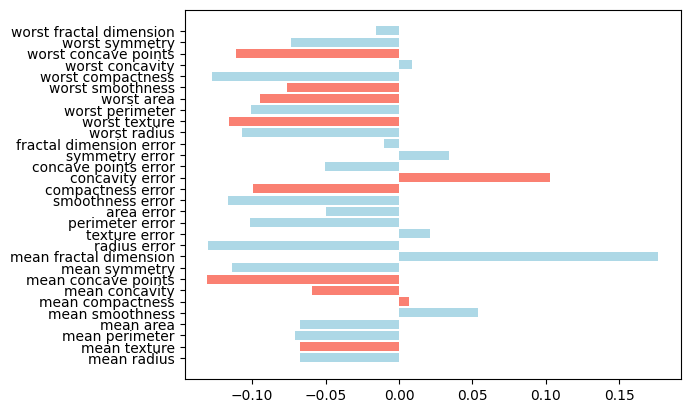

In [124]:
weights = e_x.get_weights()
columns = X_train.columns
colors = ['salmon' if c in CONFIG.dominant_features else 'lightblue' for c in columns]

plt.barh(columns, weights, color=colors)

### Test on positive and unlabeled data

In [125]:
s_pred = e_x.predict(X_test.values)
results_1= metrics(s_test, s_pred)
results_1

,precision,recall,f1-score,support
0,0.73,0.70,0.72,87.00
1,0.40,0.44,0.41,39.00
accuracy,0.62,0.62,0.62,0.62
macro avg,0.57,0.57,0.57,126.00
weighted avg,0.63,0.62,0.62,126.00


### Test on postive and negative data

In [126]:
y_pred = e_x.predict(X_test.values)
results_2 = metrics(y_test, y_pred)
results_2

,precision,recall,f1-score,support
0,0.55,0.98,0.71,47.0
1,0.98,0.53,0.69,79.0
accuracy,0.70,0.70,0.70,0.7
macro avg,0.77,0.76,0.70,126.0
weighted avg,0.82,0.70,0.70,126.0


In [127]:
# assert results_1["f1-score"].iloc[1] > results_2["f1-score"].iloc[1], "The labeled or not task should be easier than the positive and negative task"

### Train fully supervised

In [128]:
## train fully supervised
y_x = ClassicLogReg(penalty="l2")
y_x.fit(X_train.values, y_train)

In [129]:
s_pred = y_x.predict(X_test.values)
results_3= metrics(s_test, s_pred)
results_3

,precision,recall,f1-score,support
0,0.96,0.51,0.66,87.00
1,0.46,0.95,0.62,39.00
accuracy,0.64,0.64,0.64,0.64
macro avg,0.71,0.73,0.64,126.00
weighted avg,0.80,0.64,0.65,126.00


In [130]:
y_pred = y_x.predict(X_test.values)
results_2 = metrics(y_test, y_pred)
results_2

,precision,recall,f1-score,support
0,0.96,0.94,0.95,47.00
1,0.96,0.97,0.97,79.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.96,0.96,126.00
weighted avg,0.96,0.96,0.96,126.00


### QUANTILE based pseudo set, worst clf


In [131]:
pred = e_x.predict_proba(X_train.values)
alpha = ALPHA
threshold = np.quantile(pred, alpha)


In [132]:
psuedo_positives_idx = s_train > 0
for i,sample in enumerate(X_train.values):
    if pred[i] > threshold:
        psuedo_positives_idx[i] = True

X_psuedo,y_psuedo = X_train[psuedo_positives_idx], s_train[psuedo_positives_idx]

In [133]:
e_x = ClassicLogReg(penalty="l2")
e_x.fit(X_psuedo.values, y_psuedo.values)
s_pred = e_x.predict(X_test.values)
results_5 = metrics(s_pred, s_test)
results_5

,precision,recall,f1-score,support
0,0.11,0.71,0.20,14.00
1,0.90,0.31,0.46,112.00
accuracy,0.36,0.36,0.36,0.36
macro avg,0.51,0.51,0.33,126.00
weighted avg,0.81,0.36,0.43,126.00


### QUANTILE based pseudo set, optimal clf


In [134]:
pred = y_x.predict_proba(X_train.values)
alpha = ALPHA
threshold = np.quantile(pred, alpha)


In [135]:
psuedo_positives_idx = s_train > 0
for i,sample in enumerate(X_train.values):
    if pred[i] > threshold:
        psuedo_positives_idx[i] = True

X_psuedo,y_psuedo = X_train[psuedo_positives_idx], s_train[psuedo_positives_idx]

In [136]:
e_x.fit(X_psuedo.values, y_psuedo.values)
s_pred = e_x.predict(X_test.values)
results_6 = metrics(s_test, s_pred)
results_6

,precision,recall,f1-score,support
0,0.79,0.13,0.22,87.00
1,0.32,0.92,0.48,39.00
accuracy,0.37,0.37,0.37,0.37
macro avg,0.55,0.52,0.35,126.00
weighted avg,0.64,0.37,0.30,126.00


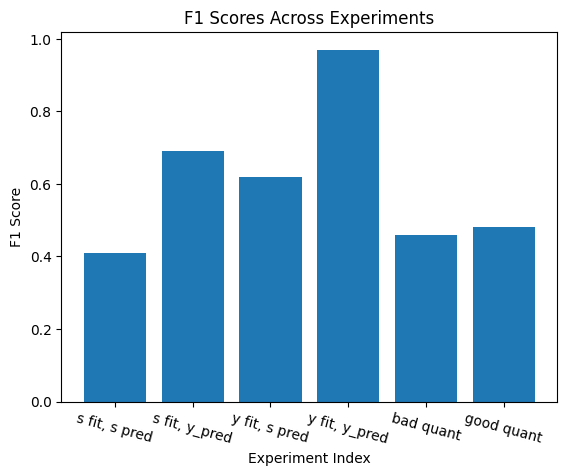

In [137]:
plt.figure()
plt.bar(range(len(f1_scores)), f1_scores)
plt.xlabel('Experiment Index')
plt.ylabel('F1 Score')
plt.xticks(range(len(f1_scores)), ["s fit, s pred","s fit, y_pred","y fit, s pred", "y fit, y_pred", "bad quant","good quant"],rotation=-15)
plt.title('F1 Scores Across Experiments')
plt.show()


<BarContainer object of 30 artists>

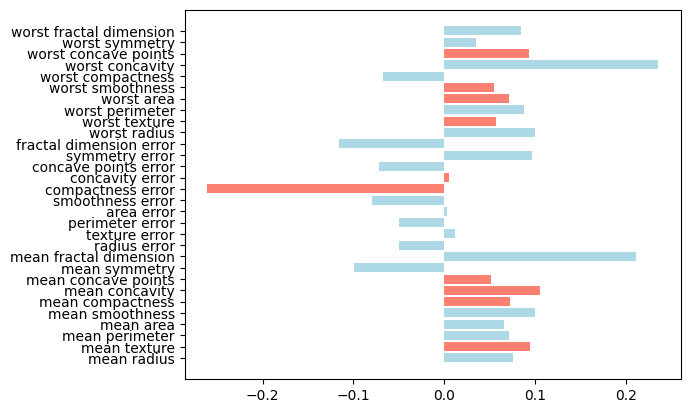

In [138]:
weights = e_x.get_weights()
columns = X_train.columns
colors = ['salmon' if c in CONFIG.dominant_features else 'lightblue' for c in columns]

plt.barh(columns, weights, color=colors)